In [35]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

sys.path.append("../")

In [40]:
PATH_JSON = "../static/web_service/extern_clean/alignment/"

In [41]:
files = set()
for file in os.listdir(PATH_JSON):
    file_id = file.split('.')[0]
    files.add(file_id)

In [42]:
probs = {}
for file in files:
    probs[file] = np.array(json.load(open(f'{PATH_JSON}/{file}.json'))['probs'])

In [43]:
images = {}
for file in files:
    img = np.asarray(Image.open(f'{PATH_JSON}/{file}.png'))
    images[file] = img

In [44]:
def signa2noise(probs, th):
    noise = probs[:, 0]
    signal = np.max(probs[:, 1:], axis = 1)
    snr = signal / noise
    return snr

In [71]:
def detect_region(snr, th):
    regions = []
    start = -1
    for i in range(0, len(snr)):
        if snr[i] > th and start < 0:
            start = i
        if snr[i] < th and start > 0:
            regions.append((start, i))
            start = -1
    return regions

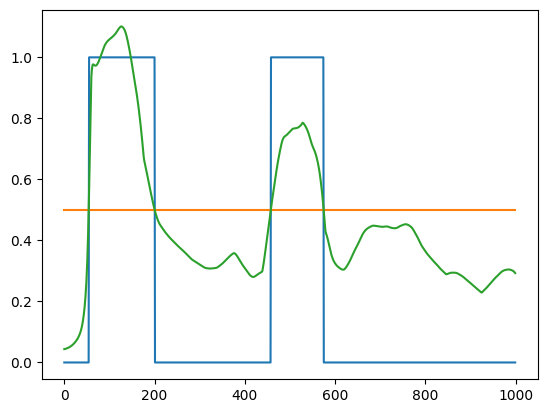

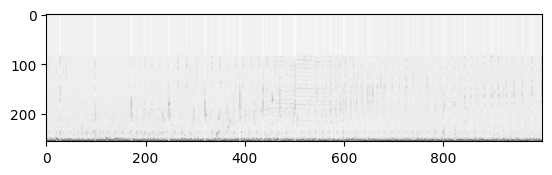

In [81]:
def inspect(file, start, stop, th):
    snr = signa2noise(probs[file][start:stop], 0.1)
    regions = detect_region(snr, th)
    plt_regions = np.zeros(stop - start)
    for s, e in regions:
        plt_regions[s:e] = 1
    plt.plot(plt_regions)
    plt.plot(np.ones(stop-start) * th)
    plt.plot(snr)
    plt.show()
    plt.imshow(images[file][:, start:stop, :])
    plt.show()

inspect('081910N_22491000_25137000', 4000, 5000, 0.5)